# Subreddit Links Directed Graph

In [ ]:
#Link to the presentation for this week
# https://docs.google.com/presentation/d/162VRa2IDHpAmrgySRUAA-1mkdP0GwhPksnFvQhf3BCE/edit#slide=id.p

Source:
https://snap.stanford.edu/data/soc-RedditHyperlinks.html

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from networkx.drawing.nx_agraph import graphviz_layout
import urllib 
#Zinoviev, Dmitry. Complex Network Analysis in Python (p. 70). Pragmatic Bookshelf. Kindle Edition. 

Note: There's a bit of dependency hell going on here.  You need scipy 1.8.0 or greater.  I made this using scipy 1.8.1 and networkx version 2.7.1

In [38]:
print(scipy.__version__)
print(nx.__version__)

1.7.3
2.6.3


In [39]:
url="https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"
df1=pd.read_csv(url, sep='\t')

In [41]:
df1.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [42]:
df1.shape

(286561, 6)

In [7]:
def MakeListForProperties(strParam, sepchar=","):
    returnList= []
    position = 0
    count = 0
    for char in strParam:
        #print(count, char, position)
        if (str(char) == sepchar):
            returnList.append(float(strParam[position:count]))
            position = count+1
        count +=1
    returnList.append(strParam[position:])
    return returnList
#print(MakeListForProperties(df1.loc[0,"PROPERTIES"]))

In [8]:
templist = []
for i in (list(df1["PROPERTIES"])):
    templist.append(MakeListForProperties(i))


In [9]:
len(templist)

286561

In [10]:
templist[0:2]

[[345.0,
  298.0,
  0.75652173913,
  0.0173913043478,
  0.0869565217391,
  0.150724637681,
  0.0753623188406,
  57.0,
  53.0,
  10.0,
  4.78947368421,
  15.0,
  0.315789473684,
  1.0,
  1.0,
  345.0,
  57.0,
  35.5778947368,
  0.073,
  0.08,
  0.1748,
  0.3448275862068966,
  0.05172413793103448,
  0.034482758620689655,
  0.0,
  0.034482758620689655,
  0.0,
  0.0,
  0.0,
  0.017241379310344827,
  0.05172413793103448,
  0.10344827586206896,
  0.05172413793103448,
  0.0,
  0.10344827586206896,
  0.0,
  0.034482758620689655,
  0.034482758620689655,
  0.06896551724137931,
  0.017241379310344827,
  0.034482758620689655,
  0.0,
  0.0,
  0.10344827586206896,
  0.0,
  0.0,
  0.0,
  0.05172413793103448,
  0.017241379310344827,
  0.034482758620689655,
  0.0,
  0.0,
  0.017241379310344827,
  0.1896551724137931,
  0.034482758620689655,
  0.0,
  0.034482758620689655,
  0.034482758620689655,
  0.0,
  0.0,
  0.06896551724137931,
  0.05172413793103448,
  0.034482758620689655,
  0.034482758620689655,
  

In [11]:
df1["Properties_Listed"] = templist
df1.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,Properties_Listed
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...","[345.0, 298.0, 0.75652173913, 0.0173913043478,..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...","[101.0, 98.0, 0.742574257426, 0.019801980198, ..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...","[85.0, 85.0, 0.752941176471, 0.0235294117647, ..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....","[1124.0, 949.0, 0.772241992883, 0.001779359430..."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....","[715.0, 622.0, 0.777622377622, 0.0069930069930..."


In [12]:
G = nx.DiGraph()

In [13]:
G.add_nodes_from(list(df1["SOURCE_SUBREDDIT"]))

In [14]:
G.add_nodes_from(list(df1["TARGET_SUBREDDIT"]))

In [15]:
edges1=[]
for i in range(0,df1.shape[0]):
    edges1.append((df1.iloc[i,0], df1.iloc[i,1]))
    #if i >312:
        #break
edges1

[('leagueoflegends', 'teamredditteams'),
 ('theredlion', 'soccer'),
 ('inlandempire', 'bikela'),
 ('nfl', 'cfb'),
 ('playmygame', 'gamedev'),
 ('dogemarket', 'dogecoin'),
 ('locationbot', 'legaladvice'),
 ('indiefied', 'aww'),
 ('posthardcore', 'bestof2013'),
 ('posthardcore', 'corejerk'),
 ('gfycat', 'india'),
 ('metalcore', 'bestof2013'),
 ('metalcore', 'corejerk'),
 ('suicidewatch', 'offmychest'),
 ('dogecoin', 'novacoin'),
 ('gaming4gamers', 'fallout'),
 ('kpop', 'dota2'),
 ('airsoft', 'airsoftmarket'),
 ('circlebroke', 'childfree'),
 ('tribes', 'games'),
 ('oldschoolcoolnsfw', 'pics'),
 ('fl_vapers', 'vaperequests'),
 ('jailbreak', 'flextweak'),
 ('corejerk', 'bestof2013'),
 ('iama', 'todayilearned'),
 ('bandnames', 'books'),
 ('thedoctorstravels', 'hungergamesrp'),
 ('politicaldiscussion', 'todayilearned'),
 ('uncomfortableqs', 'debatereligion'),
 ('connecticut', 'ctbeer'),
 ('metafitnesscirclejerk', 'fitnesscirclejerk'),
 ('srssucks', 'funny'),
 ('thehiddenbar', 'writingprompts'

In [16]:
len(edges1)

286561

In [17]:
len(set(edges1))

137821

In [18]:
G.add_edges_from(set(edges1))

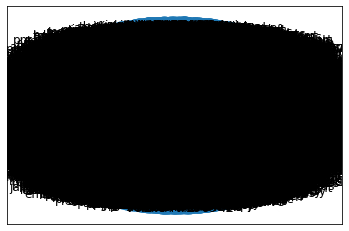

In [51]:
# nx.draw_networkx(G) # will take a very long time

In [19]:
deg = nx.degree(G)

In [20]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('askreddit', 2524),
 ('iama', 2030),
 ('subredditdrama', 1804),
 ('writingprompts', 1143),
 ('outoftheloop', 1099),
 ('pics', 957),
 ('videos', 882),
 ('leagueoflegends', 833),
 ('todayilearned', 816),
 ('gaming', 810),
 ('funny', 797),
 ('conspiracy', 780),
 ('legaladvice', 710),
 ('copypasta', 693),
 ('drama', 690),
 ('worldnews', 667),
 ('explainlikeimfive', 666),
 ('the_donald', 657),
 ('mhoc', 624),
 ('news', 591),
 ('dogecoin', 584),
 ('subredditoftheday', 582),
 ('bitcoin', 559),
 ('techsupport', 553),
 ('pcmasterrace', 541),
 ('games', 534),
 ('showerthoughts', 524),
 ('askhistorians', 514),
 ('tipofmypenis', 494),
 ('nostupidquestions', 494),
 ('shitliberalssay', 493),
 ('circlejerkcopypasta', 491),
 ('self', 490),
 ('technology', 490),
 ('hailcorporate', 484),
 ('justunsubbed', 480),
 ('movies', 471),
 ('tifu', 469),
 ('circlebroke', 466),
 ('politics', 459),
 ('help', 453),
 ('science', 451),
 ('changemyview', 447),
 ('relationships', 446),
 ('adviceanimals', 440),
 ('anim

In [21]:
nx.diameter(G)

NetworkXError: Found infinite path length because the digraph is not strongly connected